# Math 104C, Final Project#

* Yongyi Zhao (Nikki)
* June 14，2019
* Final Project

In [57]:
#import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**1.(a) Forward-time central-space scheme**

$$
U_{j}^{n+1}=U_{j}^{n}-\lambda(U_{j+1}^{n}-U_{j-1}^{n})
$$

In [58]:
def FTCS(h):
    
    """Solve the one-way wave equation using the forward-time central-space scheme"""

    # parameters
    lbd = 0.8
    k = lbd*h
    
    # size
    nt = int((2.4-0)/k)
    nx = int((3-(-1))/h)
    
    # mesh
    x = np.linspace(-1,3,nx+1)
    t = np.linspace(0,2.4,nt+1)
    sol = np.zeros((nt+1,nx+1))
    
    # initial
    U0 = ((np.cos(np.pi*x))**2)*(np.abs(x)<=1/2)
    sol[0,:] = U0
    
    # iterations
    for it in range(nt):
        for ix in range(1,nx):
            sol[it+1,ix] = sol[it,ix]-lbd*(sol[it,ix+1]-sol[it,ix-1])
        sol[it+1,nx] = sol[it+1,nx-1]
        
    return x,t,sol

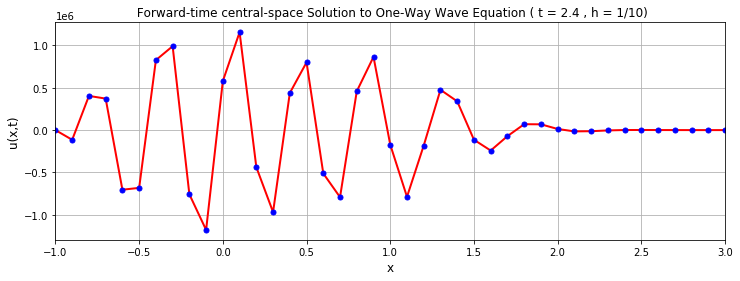

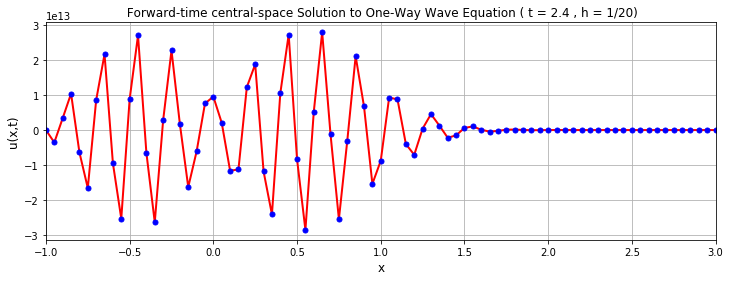

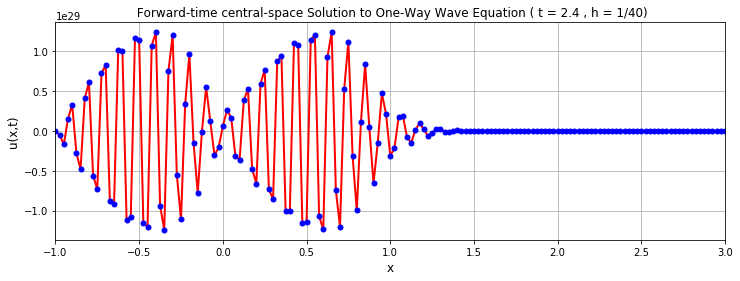

In [59]:
hs = [1/10,1/20,1/40]


for h in hs:
    
    fig = plt.figure(figsize = (12,4))
    axes = fig.add_subplot(1,1,1)
    
    # Solve
    x,t,U = FTCS(h)
    
    # Plot some of the results
    axes.plot(x, U[-1, :], "o-",lw =2,color='red',Markerfacecolor='blue',MarkerEdgecolor='blue',markersize=5, label='h = 1/%s' % int(1/h))

    # refine the figure
    axes.set_xlabel("x",fontsize=12)
    axes.set_ylabel("u(x,t)",fontsize=12)
    axes.grid()
    axes.set_title(" Forward-time central-space Solution to One-Way Wave Equation ( t = %s , h = 1/%s)"%(t[-1],int(1/h)))
    axes.set_xlim(np.min(x),np.max(x))
    axes.yaxis.get_major_formatter().set_powerlimits((0,1))
    plt.show()

**(b). Leapfrog scheme**
$$
U_{j}^{n+1}=U_{j}^{n-1}-\lambda(U_{j+1}^{n}-U_{j-1}^{n})
$$


In [60]:
def LF(h):
    
    """Solve the one-way wave equation using the Leapfrog scheme"""

    # parameters
    lbd = 0.8
    k = lbd*h
    
    # size
    nt = int((2.4-0)/k)
    nx = int((3-(-1))/h)
    
    # mesh
    x = np.linspace(-1,3,nx+1)
    t = np.linspace(0,2.4,nt+1)
    sol = np.zeros((nt+1,nx+1))       
    
    # initial
    U0 = ((np.cos(np.pi*x))**2)*(np.abs(x)<=1/2)
    sol[0,:] = U0
    
    # iterations
    for it in range(nt):
        for ix in range(1,nx):
            if it == 0:
                sol[it+1,ix] = sol[it,ix]-lbd*(sol[it,ix+1]-sol[it,ix-1])
            else:
                sol[it+1,ix] = sol[it-1,ix]-lbd*(sol[it,ix+1]-sol[it,ix-1])
        sol[it+1,nx] = sol[it+1,nx-1]

    return x,t,sol

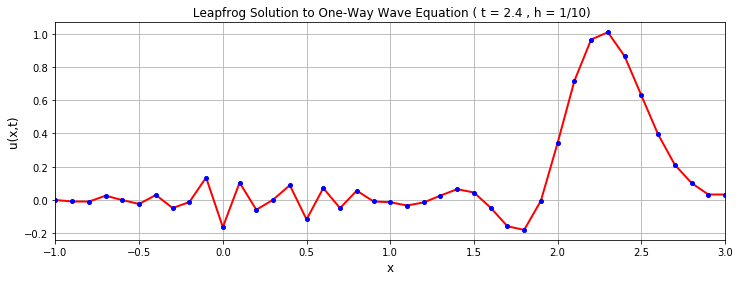

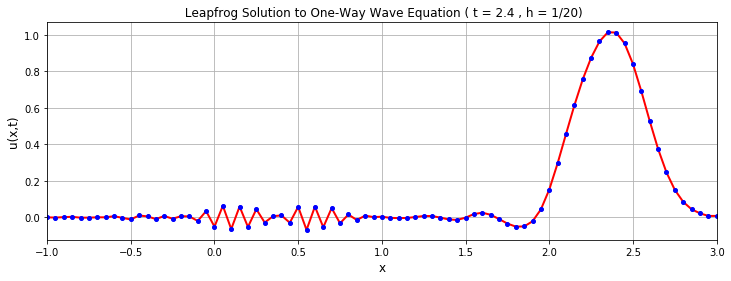

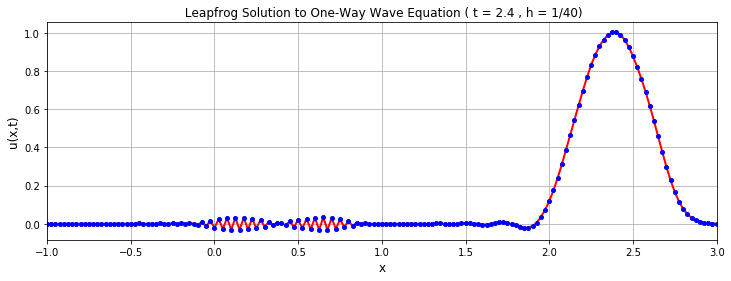

In [61]:
hs = [1/10,1/20,1/40]


for h in hs:
    
    fig = plt.figure(figsize = (12,4))
    axes = fig.add_subplot(1,1,1)
    
    # Solve
    x,t,U = LF(h)
    
    # Plot some of the results
    axes.plot(x, U[-1, :], "o-",lw =2,color='red',Markerfacecolor='blue',MarkerEdgecolor='blue',markersize=4, label='h = 1/%s' % int(1/h))

    # refine the figure
    axes.set_xlabel("x",fontsize=12)
    axes.set_ylabel("u(x,t)",fontsize=12)
    axes.grid()
    axes.set_title(" Leapfrog Solution to One-Way Wave Equation ( t = %s , h = 1/%s)"%(t[-1],int(1/h)))
    axes.set_xlim(np.min(x),np.max(x))
    #axes.yaxis.get_major_formatter().set_powerlimits((0,1))
    plt.show()

**(c). Upwind scheme**
$$
U_{j}^{n+1}=U_{j}^{n}-\lambda(U_{j}^{n}-U_{j-1}^{n})
$$

In [62]:
def UP(h):
    
    
    """Solve the one-way wave equation using the Upwind scheme"""

    # parameters
    lbd = 0.8
    k = lbd*h
    
    # size
    nt = int((2.4-0)/k)
    nx = int((3-(-1))/h)
    
    # mesh
    x = np.linspace(-1,3,nx+1)
    t = np.linspace(0,2.4,nt+1)
    sol = np.zeros((nt+1,nx+1)) 
                    
    # initial
    U0 = ((np.cos(np.pi*x))**2)*(np.abs(x)<=1/2)
    sol[0,:] = U0

    # iterations   
    for it in range(nt):
        for ix in range(1,nx+1):
            sol[it+1,ix] = sol[it,ix]-lbd*(sol[it,ix]-sol[it,ix-1])
    return x,t,sol

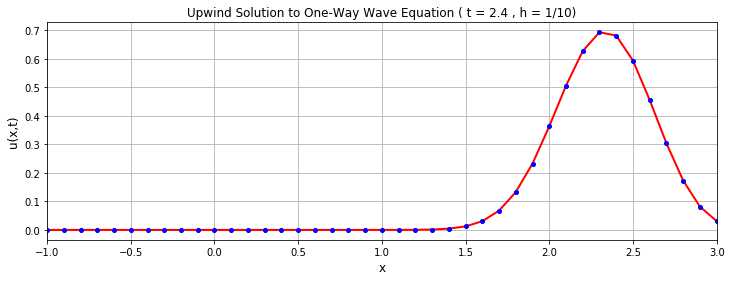

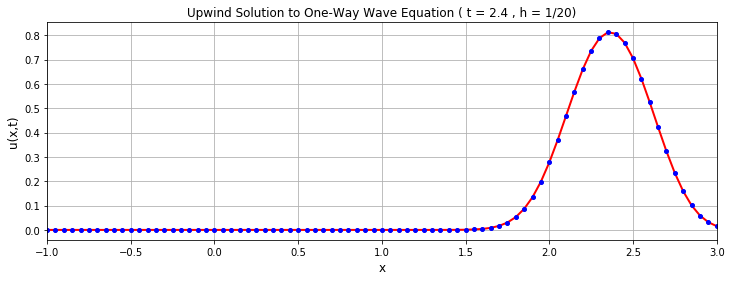

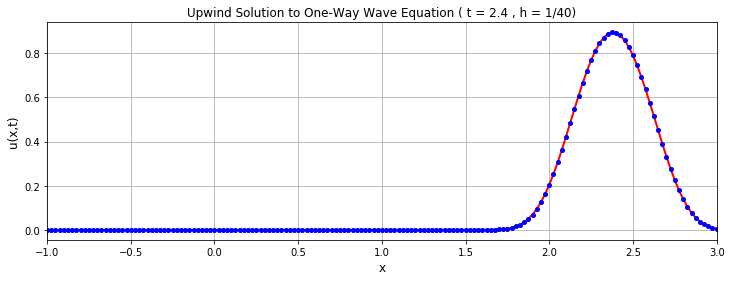

In [63]:
hs = [1/10,1/20,1/40]


for h in hs:
    
    fig = plt.figure(figsize = (12,4))
    axes = fig.add_subplot(1,1,1)
    
    # Solve
    x,t,U = UP(h)
    
    # Plot some of the results
    axes.plot(x, U[-1, :], "o-",lw =2,color='red',Markerfacecolor='blue',MarkerEdgecolor='blue',markersize=4, label='h = 1/%s' % int(1/h))

    # refine the figure
    axes.set_xlabel("x",fontsize=12)
    axes.set_ylabel("u(x,t)",fontsize=12)
    axes.grid()
    axes.set_title("Upwind Solution to One-Way Wave Equation ( t = %s , h = 1/%s)"%(t[-1],int(1/h)))
    axes.set_xlim(np.min(x),np.max(x))
    # axes.yaxis.get_major_formatter().set_powerlimits((0,1))
    plt.show()

**(d). Lax-Friedrichs scheme**
$$
U_{j}^{n+1}=\frac{1}{2}(U_{j+1}^{n}+U_{j-1}^{n})-\frac{\lambda}{2}(U_{j+1}^{n}-U_{j-1}^{n})
$$

In [64]:
def Lax(h):
    
    
    """Solve the one-way wave equation using the Lax-Friedrichs scheme"""

    # parameters
    lbd = 0.8
    k = lbd*h
    
    # size
    nt = int((2.4-0)/k)
    nx = int((3-(-1))/h)
    
    # mesh
    x = np.linspace(-1,3,nx+1)
    t = np.linspace(0,2.4,nt+1)
    sol = np.zeros((nt+1,nx+1)) 
                    
    # initial
    U0 = ((np.cos(np.pi*x))**2)*(np.abs(x)<=1/2)
    sol[0,:] = U0
          
    # iterations    
    for it in range(nt):
        for ix in range(1,nx):
            sol[it+1,ix] = 1/2*(sol[it,ix+1]+sol[it,ix-1])-lbd/2*(sol[it,ix+1]-sol[it,ix-1])
        sol[it+1,nx] = sol[it+1,nx-1]
    return x,t,sol


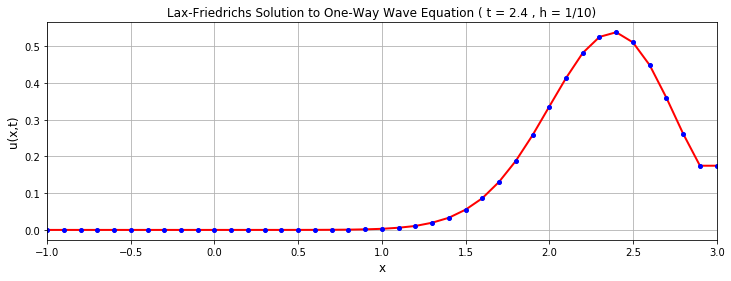

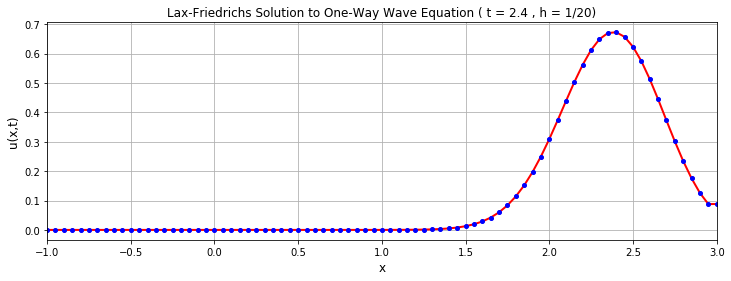

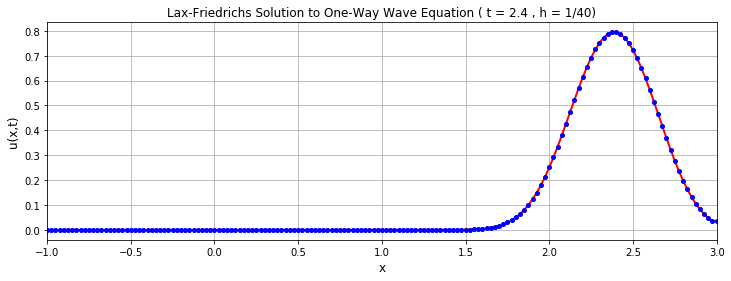

In [65]:
hs = [1/10,1/20,1/40]

for h in hs:
    
    fig = plt.figure(figsize = (12,4))
    axes = fig.add_subplot(1,1,1)
    
    # Solve
    x,t,U = Lax(h)
    
    # Plot some of the results
    axes.plot(x, U[-1, :], "o-",lw =2,color='red',Markerfacecolor='blue',MarkerEdgecolor='blue',markersize=4, label='h = 1/%s' % int(1/h))

    # refine the figure
    axes.set_xlabel("x",fontsize=12)
    axes.set_ylabel("u(x,t)",fontsize=12)
    axes.grid()
    axes.set_title("Lax-Friedrichs Solution to One-Way Wave Equation ( t = %s , h = 1/%s)"%(t[-1],int(1/h)))
    axes.set_xlim(np.min(x),np.max(x))
    # axes.yaxis.get_major_formatter().set_powerlimits((0,1))
    plt.show()

First, Scheme(a) is unstable so useless since it does not converge to the exact solution $cos^2(\pi(x-t))$ and other three scheme are stable scheme, they all converge to the true solution when k = 0.025.

Second, I notice that the blow-up time decreases as the mesh size decreases.  

The scheme (b)  is the useful cases.

In [75]:
# Leapfrog convergent rate
# differnent h result
x1,t1,sol1 = LF(1/10)
x2,t2,sol2 = LF(1/20)
x3,t3,sol3 = LF(1/40)

# compute the error
e1 = 1/10*np.linalg.norm(sol2[-1,::2]-sol1[-1,:])
e2 = 1/20*np.linalg.norm(sol3[-1,::2]-sol2[-1,:])

# print the ratio
print('The ratio of convergence is %.4f.'%(e1/e2))

The ratio of convergence is 3.9636.


So the error of Leapfrog method is $\mathcal{O}\left(h^2\right)$, as h decrease by one half, the error decrease by one forth

In [74]:
# differnent h result
x7,t7,sol7 = UP(1/10)
x8,t8,sol8 = UP(1/20)
x9,t9,sol9 = UP(1/40)

# compute the error
e5 = 1/10*np.linalg.norm(sol8[-1,::2]-sol7[-1,:])
e6 = 1/20*np.linalg.norm(sol9[-1,::2]-sol8[-1,:])

# print the ratio
print('The ratio of convergence is %.4f.'%(e5/e6))

The ratio of convergence is 2.0477.


The upwind method is $\mathcal{O}\left(h\right)$

In [73]:
# differnent h result
x4,t4,sol4 = Lax(1/10)
x5,t5,sol5 = Lax(1/20)
x6,t6,sol6 = Lax(1/40)

# compute the error
e3 = 1/10*np.linalg.norm(sol5[-1,::2]-sol4[-1,:])
e4 = 1/20*np.linalg.norm(sol6[-1,::2]-sol5[-1,:])

# print the ratio
print('The ratio of convergence is %.4f.'%(e3/e4))

The ratio of convergence is 1.7105.


The Lax-Friedrichs method is $\mathcal{O}\left(h\right)$

**2.**

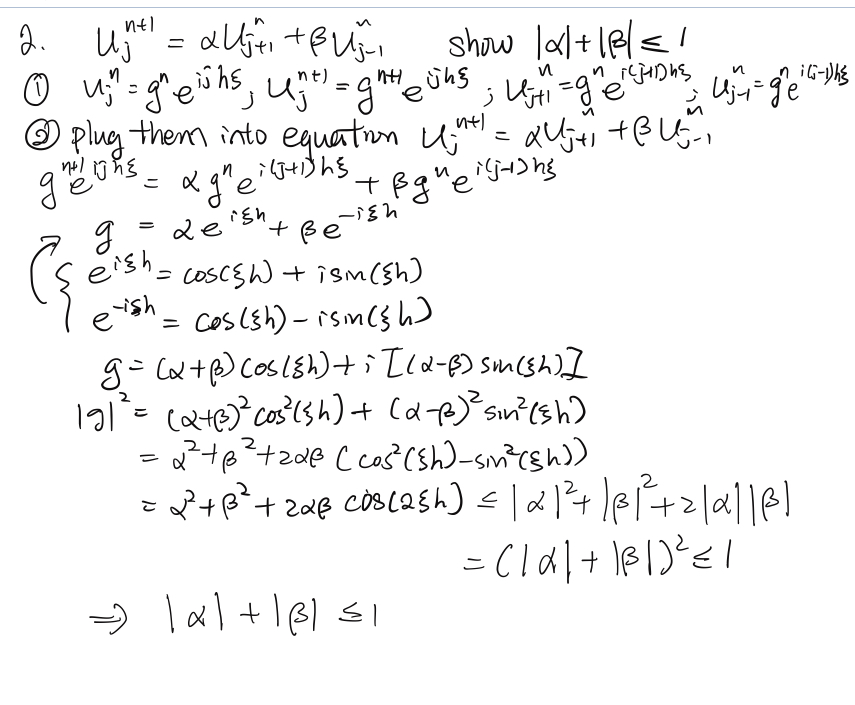

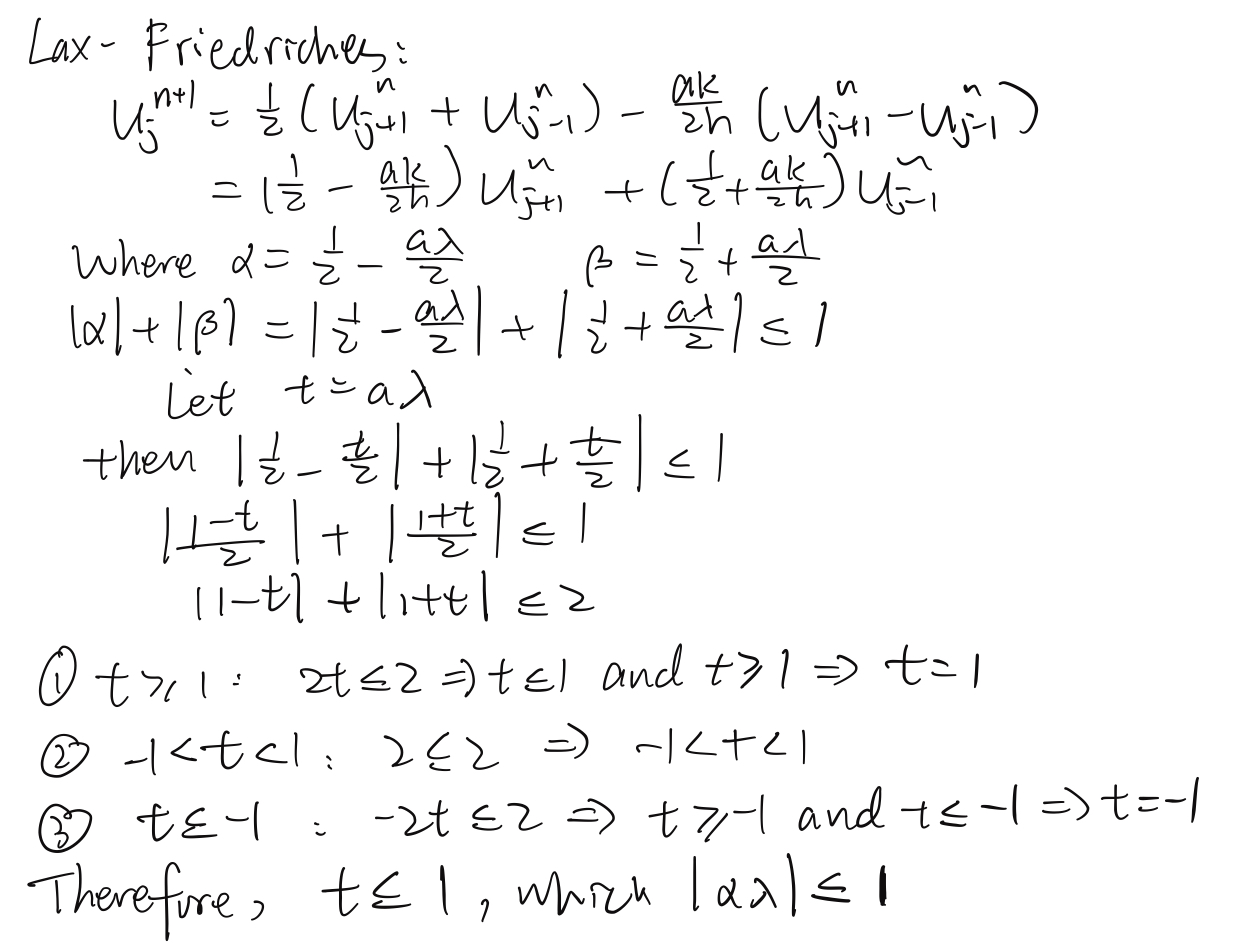